<a href="https://colab.research.google.com/github/prishi29/Human_Activity_Recognition/blob/main/HumanActivityRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Human Activity Recognition




Human activity recognition, or HAR for short, is a broad field of study concerned with identifying the specific movement or action of a person based on sensor data.

Movements are often typical activities performed indoors, such as walking, talking, standing, and sitting. They may also be more focused activities such as those types of activities performed in a kitchen or on a factory floor.

The sensor data may be remotely recorded, such as video, radar, or other wireless methods. Alternately, data may be recorded directly on the subject such as by carrying custom hardware or smart phones that have accelerometers and gyroscopes.

**Accelerometers** is an electronic sensor that measures the acceleration forces acting on an object, in order to determine the object’s position in space and monitor the object’s movement

**Gyroscope** is a device that can measure and maintain the orientation and angular velocity of an object. These are more advanced than accelerometers. These can measure the tilt and lateral orientation of the object whereas accelerometer can only measure the linear motion.

This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone.


**Attribute Information:**
For each record in the dataset it is provided:

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.

- Triaxial Angular velocity from the gyroscope.
- A 561-feature vector with time and frequency domain variables.
- Its activity label.
An identifier of the subject who carried out the experiment.
### Main features '-XYZ' is used to denote 3-axial signals in the X, Y and Z directions.

1. The angleXgravityMean represents the effect of acceleration along x-axis due to gravity.
2. The angleYgravityMean represents the effect of acceleration along y-axis due to gravity.
3. The angleZgravityMean represents the effect of acceleration along z-axis due to gravity.

#Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

The dataset is already divided in training and testing datasets

In [ ]:
#Loading the training and testing datasets
train=pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

#Data Cleaning

In [ ]:
#Checking the shape of training and testing datasets
print("Shape of the training dataset :",train.shape)
print("Shape of the training dataset :",test.shape)

Shape of the training dataset : (7352, 563)
Shape of the training dataset : (2947, 563)


In [ ]:
#Checking the first 5 rows
train.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [ ]:
#Checking the data type of each variable
train.dtypes

tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object



*   Most of the predictors are of float type
*   The target variable 'activity' is of object type



In [ ]:
#Checking the number of features in both training and testing dataset
features = train.columns
print("The number of features in training dataset:",len(features))
features_t = test.columns
print("The number of features in testing dataset:",len(features_t))

The number of features in training dataset: 563
The number of features in testing dataset: 563


In [ ]:
#Changing the variable names for easier analysis
features = features.str.replace('[()]','')
features = features.str.replace('[-]','')
features = features.str.replace('[,]','')

train.columns = features
test.columns = features

train.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

In [ ]:
#Renaming the target variable from 'Activity' to 'activity' for consistency
train.rename(columns={'Activity':'activity'},inplace = True)
test.rename(columns={'Activity':'activity'},inplace = True)
train.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'activity'],
      dtype='object', length=563)

In [ ]:
#Checking the number of unique values in each column
train.nunique()

tBodyAccmeanX        7347
tBodyAccmeanY        7352
tBodyAccmeanZ        7349
tBodyAccstdX         7349
tBodyAccstdY         7351
                     ... 
angleXgravityMean    7352
angleYgravityMean    7352
angleZgravityMean    7352
subject                21
activity                6
Length: 563, dtype: int64

In [ ]:
#Lets see the unique values of our target variable 'activity'
print(train['activity'].unique())

['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [ ]:
print(train['subject'].unique())

[ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]


In [ ]:
#Checking the descriptive statistics summary
train.describe()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [ ]:
# for i in features:
#   print(i)

CHECKING FOR MISSING VALUES AND DUPLICATES

In [ ]:
print("The total number of missing values in training dataset:",train.isnull().values.sum())
print("The total number of missing values in testing dataset:",test.isnull().values.sum())

The total number of missing values in training dataset: 0
The total number of missing values in testing dataset: 0


In [ ]:
print("The total number of duplicates in training dataset:",train.duplicated().sum())
print("The total number of duplicates in testing dataset:",test.duplicated().sum())

The total number of duplicates in training dataset: 0
The total number of duplicates in testing dataset: 0




*   There are no missing values in our dataset
*   There are no duplicate values in our dataset



CHECKING FOR IMBALANCE IN THE DATASET

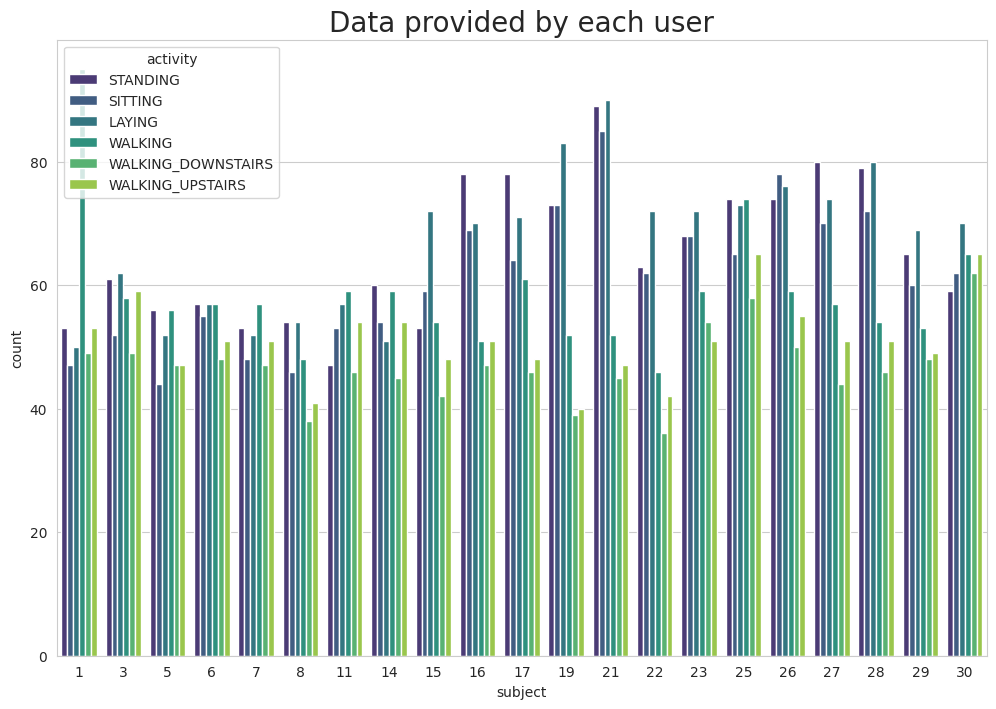

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='activity', palette='viridis', data=train)
plt.show()

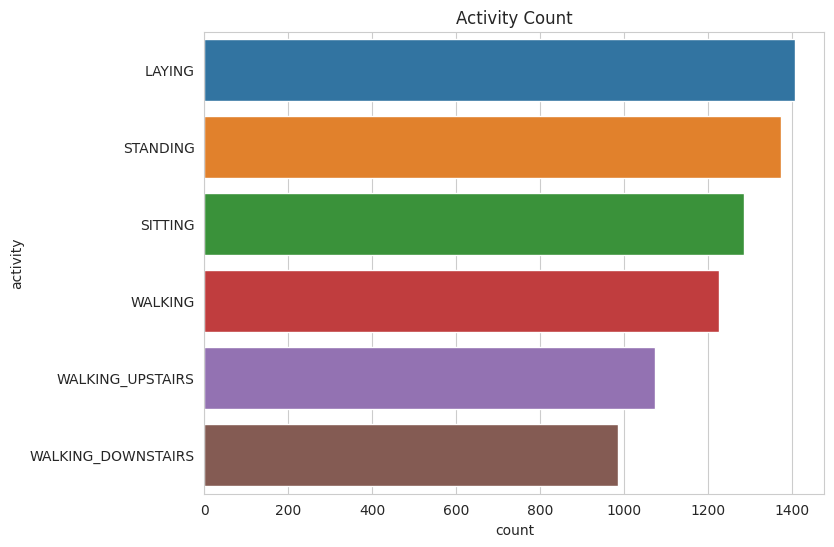

In [ ]:
desc= train['activity'].value_counts().sort_values(ascending=False).index
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
plt.title("Activity Count")
sns.countplot(y='activity',data=train,order=desc)
plt.show()

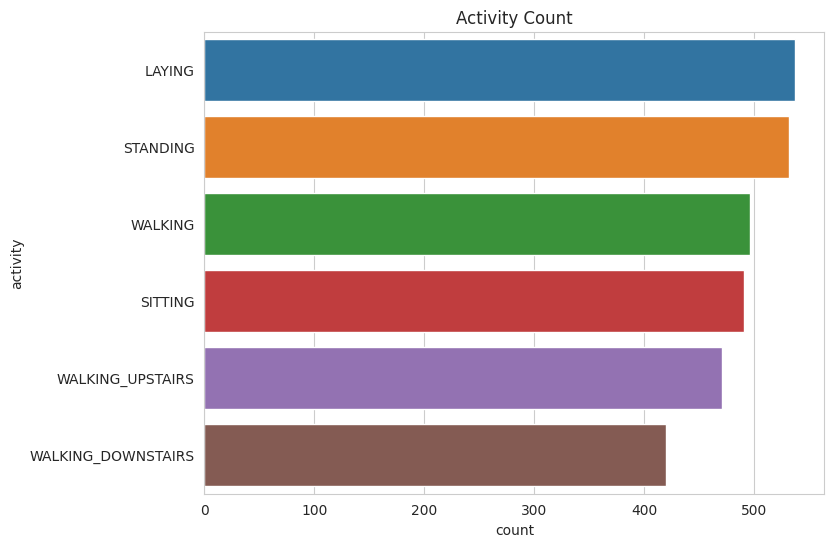

In [ ]:
desc= test['activity'].value_counts().sort_values(ascending=False).index
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
plt.title("Activity Count")
sns.countplot(y='activity',data=test,order=desc)
plt.show()

- We have got almost same number of reading from all the 30 subjects which
indicates that the data is more or less balanced for both the training and testing data and it does not require resampling.
- The data points per activity is also quite balanced.

#Exploratory Data Analysis (EDA)

In [ ]:
#Lets check the importance of each sensor
Acc = 0
Gyro = 0
Others = 0
for i in train.columns:
  if 'Acc' in i:
    Acc = Acc+1
  elif 'Gyro' in i:
    Gyro = Gyro+1
  else:
    Others = Others+1

In [ ]:
plt.figure(figsize=(8,6))
px.bar(x=['Accelerometer ','Gyroscope ','Others'],y=[Acc,Gyro,Others],color=[Acc,Gyro,Others],
       title = 'Sensors importance',width=400, height=400)


<Figure size 800x600 with 0 Axes>



- The most used sensor is Accelerometer followed by Gyroscope and others are irrelevant
- Our analysis will mostly be focused on Accelerometer



Lets divide our Activities into STATIC and DYNAMIC activities

- STATIC : Sitting, Standing, Laying
- DYNAMIC : Walking, Walking_downstairs, Walking_Upstairs

In [ ]:
mapping = {
    'LAYING': 'Static',
    'SITTING': 'Static',
    'STANDING': 'Static',
    'WALKING' : 'Dynamic',
    'WALKING_UPSTAIRS' : 'Dynamic',
    'WALKING_DOWNSTAIRS' : 'Dynamic'
}
train['movement'] = train['activity'].replace(mapping)
train['movement'].unique()

array(['Static', 'Dynamic'], dtype=object)

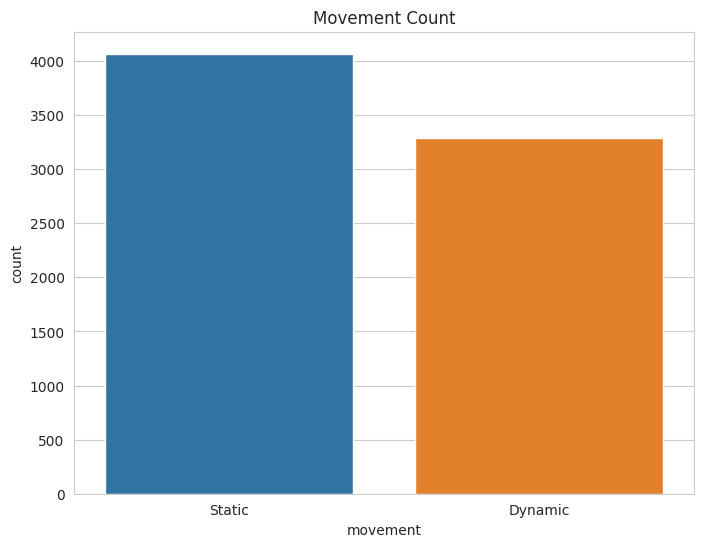

In [ ]:
#Lets visualize the static and dynamic activities
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
plt.title("Movement Count")
sns.countplot(x='movement',data=train)
plt.show()

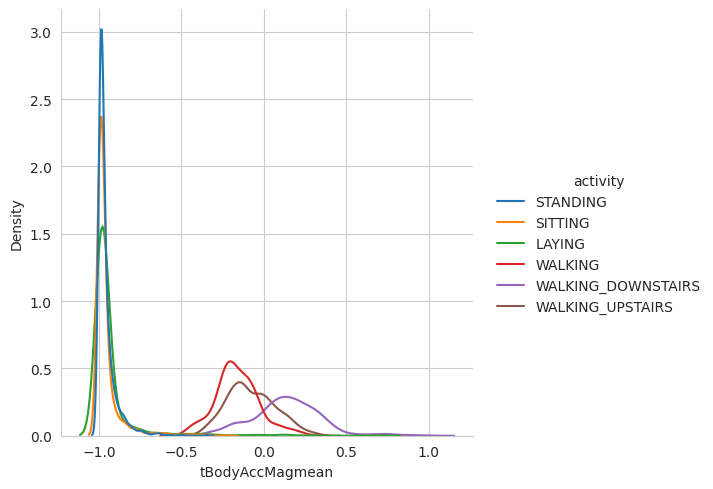

In [ ]:
#Lets visualize the probability density plot of tBodyAccMagmean for each activity

sns.displot(data=train,x='tBodyAccMagmean',hue='activity',kind='kde',fill=False)

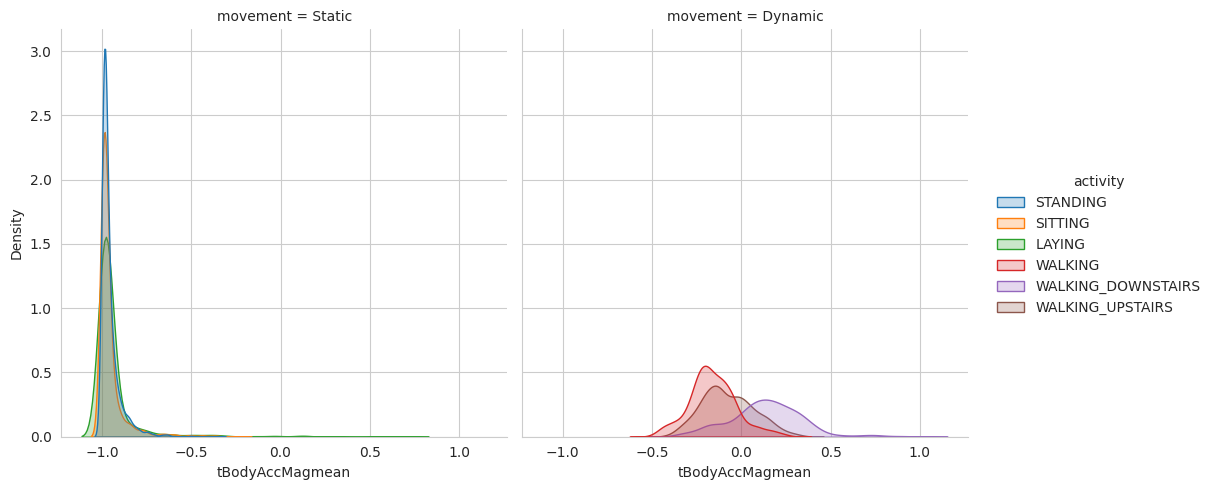

In [ ]:
#Lets visualise the density plot for static and dynamic activities separately
sns.displot(data=train,x='tBodyAccMagmean',hue='activity',kind='kde',col='movement',fill=True)


We can notice a clear difference between the static and dynamic activities
- When tBodyAccMagmean <= -0.5 then movement is Static
- When tBodyAccMagmean >= -0.5 then movement is Dynamic
*   When movement is static the distribution plot is Left Skewed which implies that mean is less than the median
*   When movement is Dynamic the skewness is different for each activity but the skewness is not extreme and hence less significant



In [ ]:
# m_count = train_t['movement'].value_counts()
# print(m_count)

- The number of datapoints for static activities are higher than the dynamic activities



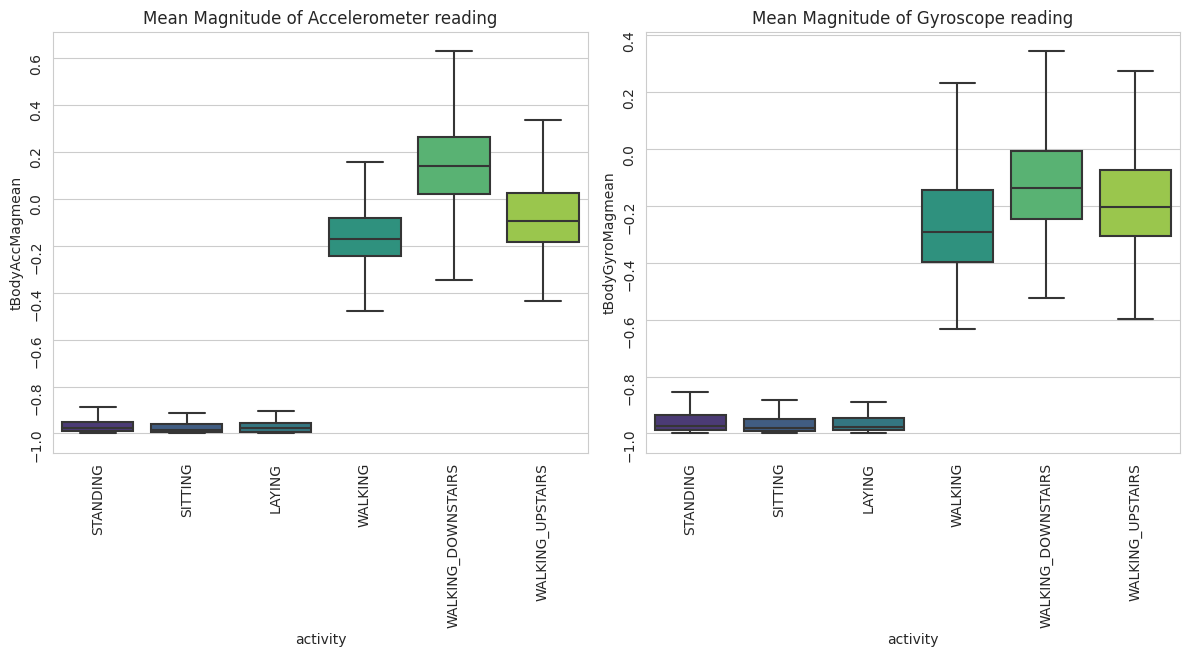

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(12,7))
s1=sns.boxplot(data=train,x="activity", y="tBodyAccMagmean",palette='viridis',showfliers=False,ax=axes[0])
s2=sns.boxplot(data=train,x="activity", y="tBodyGyroMagmean",palette='viridis',showfliers=False,ax=axes[1])
axes[0].set_title('Mean Magnitude of Accelerometer reading')
axes[1].set_title('Mean Magnitude of Gyroscope reading')
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
plt.tight_layout()
fig.subplots_adjust(top=0.9)


**Accelerometer Reading Inference**
*   When the magnitude of the tBodyAccelerationMean is < -0.8 then activity is standing, sitting or laying.(Static)
*   When the magnitude of the tBodyAccelerationMean is > -0.6 then activity is walking, walking_downstairs, walking upstairs(Dynamic)
- When the magnitude of the tBodyAccelerationMean is > 0.0 (positive) then activity is walking_downstairs.

**Gyrometer Reading Inference**
- When the magnitude of the tBodyGyroMean is < -0.8 then activity is standing, sitting or laying.
*   When the magnitude of the tBodyAccelerationMean is > -0.6 then almost all the activity is walking, walking_downstairs, walking upstairs

The readings of both accelerometer and gyrometer indicates that the activities can be divided into two groups (static and dynamic) as we have seen earlier.




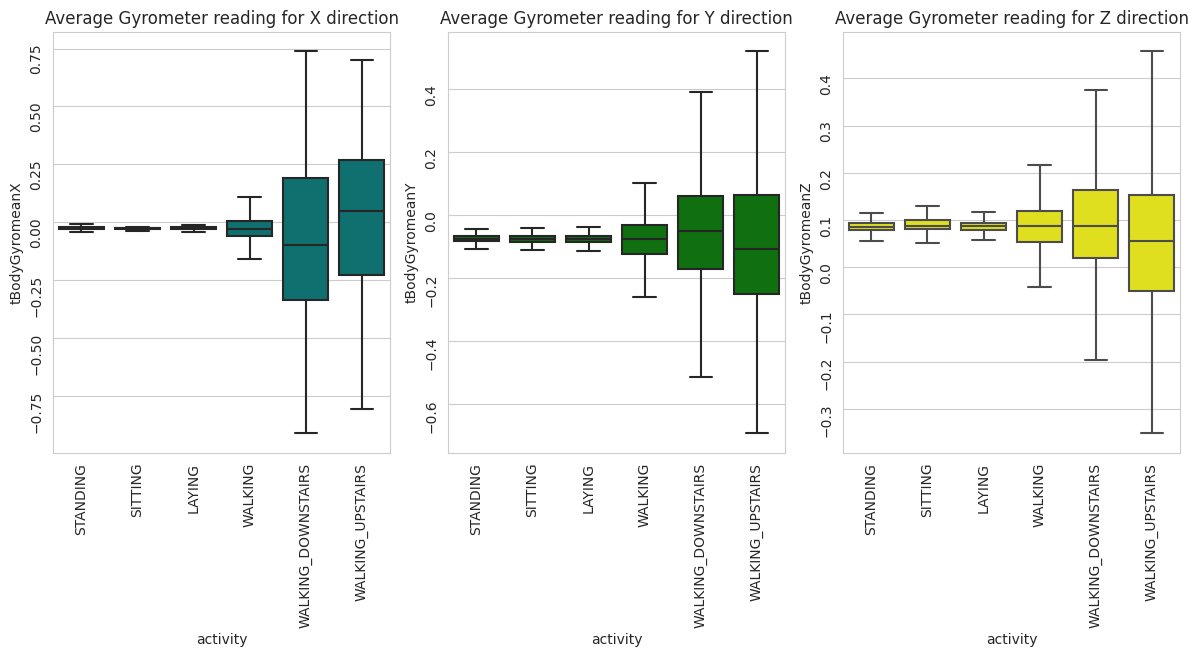

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(12,7))
s1=sns.boxplot(data=train,x="activity", y="tBodyGyromeanX",color='Teal',showfliers=False,ax=axes[0])
s2=sns.boxplot(data=train,x="activity", y="tBodyGyromeanY",color='Green',showfliers=False,ax=axes[1])
s3=sns.boxplot(data=train,x="activity", y="tBodyGyromeanZ",color='Yellow',showfliers=False,ax=axes[2])
axes[0].set_title('Average Gyrometer reading for X direction')
axes[1].set_title('Average Gyrometer reading for Y direction')
axes[2].set_title('Average Gyrometer reading for Z direction')
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
plt.tight_layout()
fig.subplots_adjust(top=0.9)

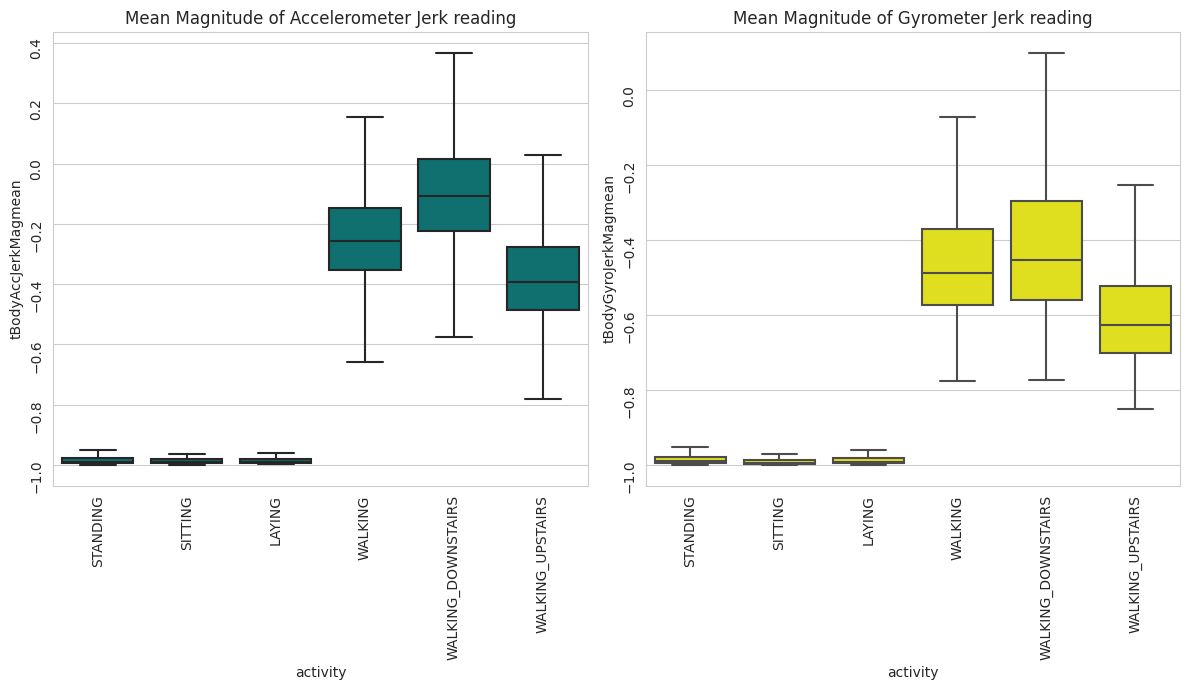

In [ ]:
fig1,axes = plt.subplots(1,2,figsize=(12,7))
s3=sns.boxplot(data=train,x="activity", y="tBodyAccJerkMagmean",color='Teal',showfliers=False,ax=axes[0])
s4=sns.boxplot(data=train,x="activity", y="tBodyGyroJerkMagmean",color='Yellow',showfliers=False,ax=axes[1])
axes[0].set_title('Mean Magnitude of Accelerometer Jerk reading')
axes[1].set_title('Mean Magnitude of Gyrometer Jerk reading')
for ax in fig1.axes:
    ax.tick_params(labelrotation=90)
plt.tight_layout()
fig.subplots_adjust(top=0.9)



*   Almost all the mean magnitude of both the sensor readings are negative.
*   When the mean magnitude of the tBodyAccJerk or tBodyGyroJerk is < -0.8 then activity is standing, sitting or laying.
- When the mean magnitude of the tBodyAccJerk is > -0.6 then activity is walking, walking downstairs or walking upstairs.
- When the mean magnitude of the tBodyGyroJerk is > -0.8 then activity is walking, walking downstairs or walking upstairs.



###The GravitySensor class is an Accelerometer's subclass. The GravitySensor's latest reading contains device’s acceleration due to the effect of gravity force about the corresponding axes.

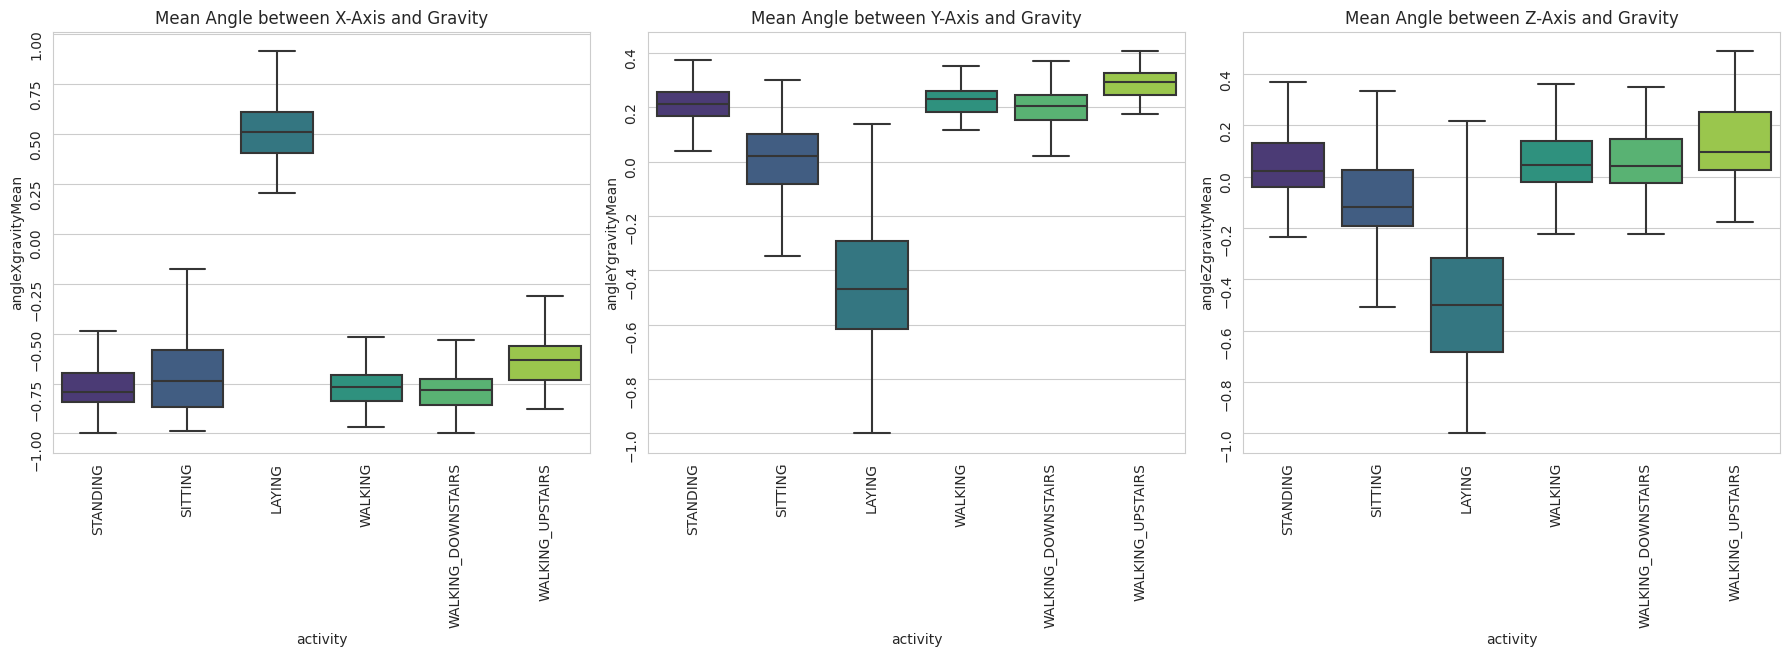

In [ ]:
fig1 ,axes = plt.subplots(1,3,figsize=(18,7))
s3=sns.boxplot(data=train,x="activity", y="angleXgravityMean",palette='viridis',showfliers=False,ax=axes[0])
s4=sns.boxplot(data=train,x="activity", y="angleYgravityMean",palette='viridis',showfliers=False,ax=axes[1])
s5=sns.boxplot(data=train,x="activity", y="angleZgravityMean",palette='viridis',showfliers=False,ax=axes[2])
axes[0].set_title('Mean Angle between X-Axis and Gravity')
axes[1].set_title('Mean Angle between Y-Axis and Gravity')
axes[2].set_title('Mean Angle between Z-Axis and Gravity')
for ax in fig1.axes:
    ax.tick_params(labelrotation=90)
plt.tight_layout()
fig1.subplots_adjust(top=0.9)



*   When the mean angle between X-axis and gravity is > 0.0(i.e. positive) , then the activity is laying and if < 0.0 (i.e. negative) then it can be any other activity.
*  When the mean angle between Y-axis and gravity is < 0.2 then the activity is laying and if > 0.2 (i.e. negative) then it can be any other activity.
*  Similarly when the mean angle between Z-axis and gravity is < 0.2 then the activity is laying and if > 0.2 (i.e. negative) then it can be any other activity.



On an average the mean angle between the x axis and gravity for laying is much higher than the other activities.

On an average the mean angle between the y axis and gravity for laying is much lower than the other activities.

On an average the mean angle between the z axis and gravity for laying is much lower than the other activities.


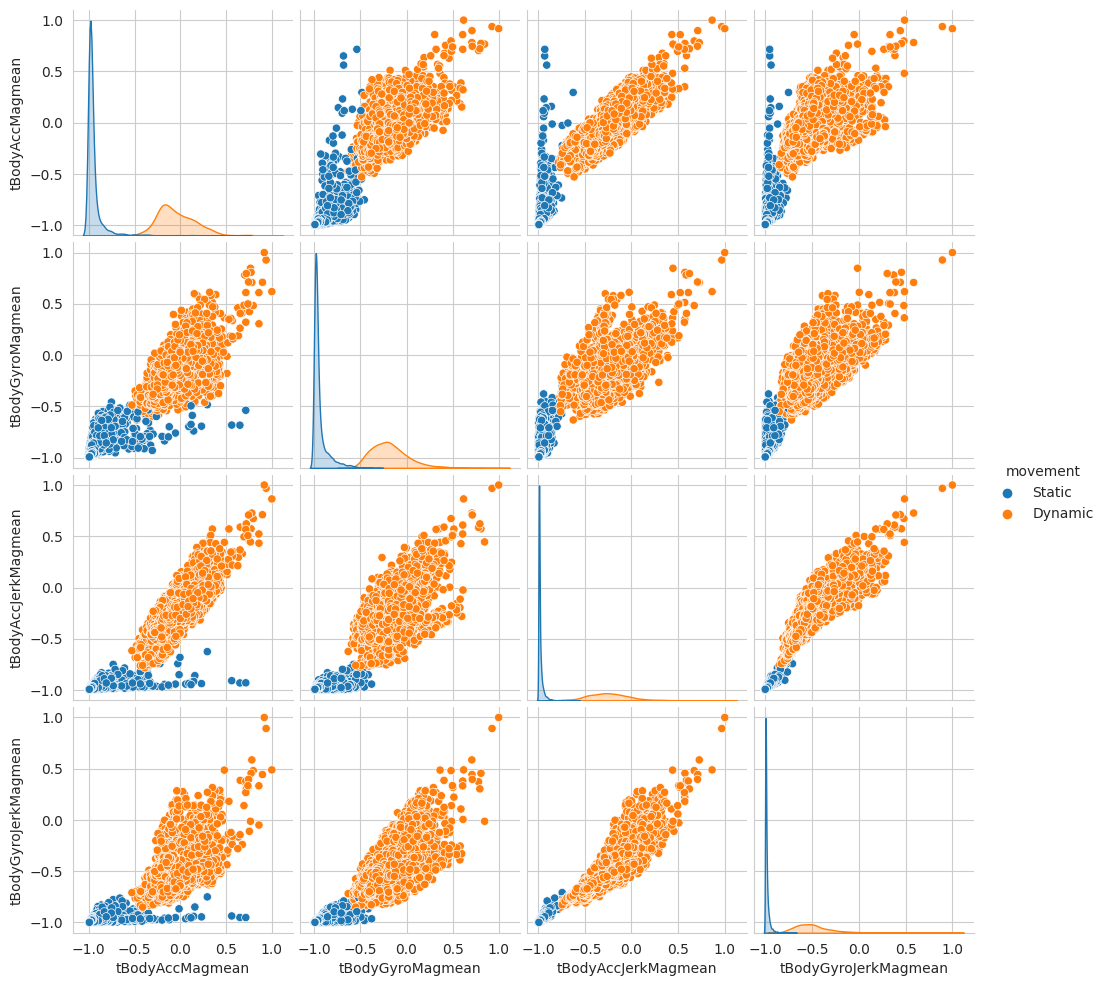

In [ ]:
sns.pairplot(train, hue = 'movement', vars = ['tBodyAccMagmean', 'tBodyGyroMagmean', 'tBodyAccJerkMagmean', 'tBodyGyroJerkMagmean'])

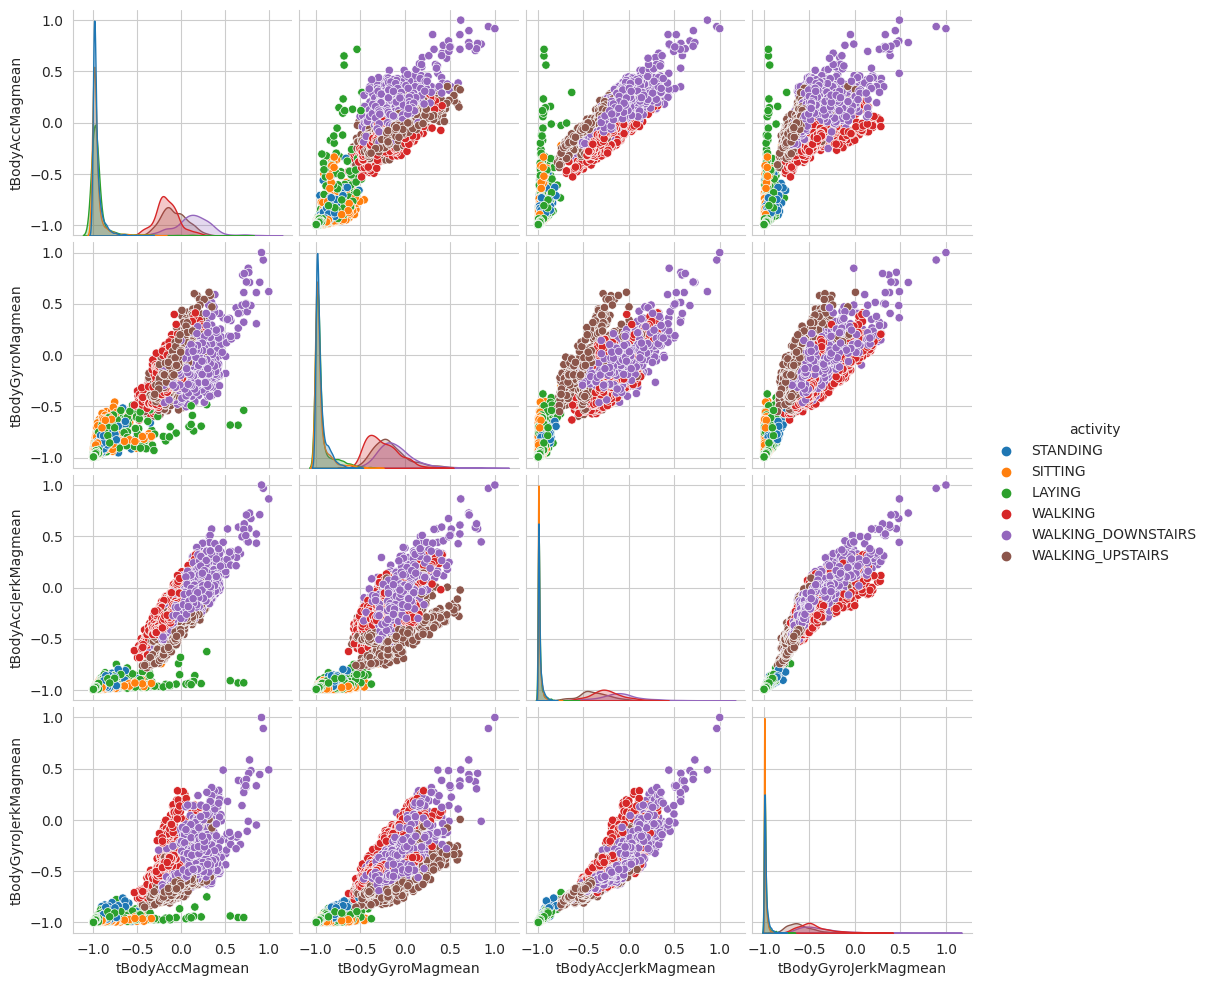

In [ ]:
sns.pairplot(train, hue = 'activity', vars = ['tBodyAccMagmean', 'tBodyGyroMagmean', 'tBodyAccJerkMagmean', 'tBodyGyroJerkMagmean'])

General Observation :
1. When the combined readings of the Accelerometer and Gyroscope for body acceleration and jerk is low then the movement is mostly static in nature.
2. When the combined readings of the Accelerometer and Gyroscope for body acceleration and jerk is high then the movement is mostly dynamic in nature.
3. We also see that the Accelerometer and Gyroscope readings are positively correlated implying that when Accelerometer reading increases the Gyroscope readings also increases, especially for dynamic movements.

#Dimentionality reduction using Principal Component Analysis (PCA)

In [ ]:
#Combining the train and test data
data = pd.concat([train, test])

In [ ]:
#Lets change the categorical variable 'activity' from labels to numeric form
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['activity'] = le.fit_transform(data['activity'])

In [ ]:
data['activity'].unique()

array([2, 1, 0, 3, 4, 5])

In [ ]:
#Dividing x and y variables
x = data.drop(['subject', 'activity','movement'], axis=1)
y = data['activity']



*   Our Target Variable is Activity
*   The other variables except subject are Predictors or features



In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=42)

In [ ]:
#performing preprocessing part
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()

x_train_scaled = std_sc.fit_transform(x_train)
x_test_scaled = std_sc.transform(x_test)


In [ ]:
# Applying PCA function
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99,random_state=42)#Accounting for 99% of the variance in the dataset

x_train_reduced = pca.fit_transform(x_train)
x_test_reduced = pca.transform(x_test)

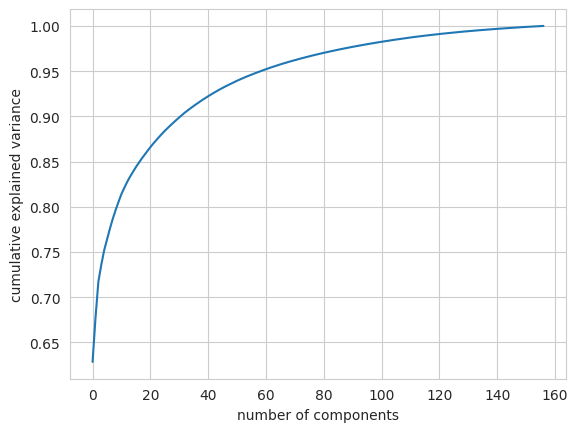

In [ ]:
pca = PCA().fit(x_train_reduced)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#The explained variance ratio is the percentage
#of variance that is attributed by each of the selected components.
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

From the graph we can see that around 15 components contribute to 85% of the variance of the data and around 155 components contributes to 100% of the variance of te data.

In [ ]:
print("Total number of original features :",x_train.shape[1])
print("Total number of reduced features :",x_train_reduced.shape[1])

Total number of original features : 561
Total number of reduced features : 157


# MODELING

In [ ]:
#importing the necessary libraries for classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
#Creating a function to plot the confusion martrix for all classification models before and after PCA
labels = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'DOWNSTAIRS',
       'UPSTAIRS']
def confusion_mat(model,model_pca,name, x_train, x_test, y_train, y_test,x_train_reduced,x_test_reduced):
    fig,ax = plt.subplots(1,2,figsize=(12,5))
    ax[0].set_title("Confusion Matrix before PCA")
    ax[1].set_title("Confusion Matrix after PCA")
    actual = y_test
    predicted1 = model.predict(x_test)
    predicted2 = model_pca.predict(x_test_reduced)
    cm1 = metrics.confusion_matrix(actual, predicted1)
    cm2 = metrics.confusion_matrix(actual, predicted2)
    p_right1 = np.trace(cm1)
    p_wrong1 = np.sum(cm1)-np.trace(cm1)
    p_right2 = np.trace(cm2)
    p_wrong2 = np.sum(cm2)-np.trace(cm2)
    cm1_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = labels)
    cm2_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels = labels)
    fig.tight_layout(pad=3.5)
    ax[0].grid(False)
    ax[1].grid(False)
    cm1_display.plot(ax=ax[0],xticks_rotation=90,cmap='RdPu')
    cm2_display.plot(ax=ax[1],xticks_rotation=90,cmap='GnBu')#viridis
    print("Right Classification before PCA:", p_right1)
    print("Right Classification after PCA :", p_right2)
    print("Wrong Classification before PCA :", p_wrong1)
    print("Wrong Classification after PCA:", p_wrong2)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

def tuning(classifier, param_grid, x_train, x_test, y_train, y_test):
    # Create the classifier
    clf = classifier()

    # Create a GridSearchCV object
    random_search = RandomizedSearchCV(clf, param_grid, cv=5, verbose=1, n_jobs=-1)

    # Perform grid search on the training data
    random_search.fit(x_train, y_train)

    # Get the best hyperparameters from the grid search
    best_params = random_search.best_params_

    # Train the classifier with the best hyperparameters on the full training data
    best_clf = classifier(**best_params).fit(x_train, y_train)

    # Evaluate the best classifier and print the confusion matrix
    y_pred = best_clf.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Best {classifier.__name__} Hyperparameters: {best_params}")

    return best_clf

In [ ]:
def evaluate_classification_perclass(model, model_pca, name, x_train, x_test, y_train, y_test, x_train_reduced, x_test_reduced, label_encoder):
    # Calculate scores for the model without PCA
    y_pred = model.predict(x_test)
    y_pred_labels = label_encoder.inverse_transform(y_pred)  # Convert back to actual labels

    # Calculate scores for the model with PCA
    y_pred1 = model_pca.predict(x_test_reduced)
    y_pred_labels1 = label_encoder.inverse_transform(y_pred1)  # Convert back to actual labels

    # Convert y_test to actual labels using the label encoder
    y_test_labels = label_encoder.inverse_transform(y_test)

    # Create DataFrames for classification reports
    class_report_without_pca = pd.DataFrame(metrics.classification_report(y_test_labels, y_pred_labels, output_dict=True))
    class_report_with_pca = pd.DataFrame(metrics.classification_report(y_test_labels, y_pred_labels1, output_dict=True))

    # Extract precision, recall, f1-score, and support for each class
    class_metrics_without_pca = class_report_without_pca.loc[['precision', 'recall', 'f1-score', 'support']]
    class_metrics_with_pca = class_report_with_pca.loc[['precision', 'recall', 'f1-score', 'support']]

    # Transpose the DataFrames to have class names as rows and metrics as columns
    class_metrics_without_pca = class_metrics_without_pca.transpose()
    class_metrics_with_pca = class_metrics_with_pca.transpose()

    # Rename the columns to distinguish between with and without PCA
    class_metrics_without_pca.columns = ['Precision (Before PCA)', 'Recall (Before PCA)', 'F1-score (Before PCA)', 'Support (Before PCA)']
    class_metrics_with_pca.columns = ['Precision (After PCA)', 'Recall (After PCA)', 'F1-score (After PCA)', 'Support (After PCA)']

    # Merge the two DataFrames to get the final DataFrame
    result_df = pd.concat([class_metrics_without_pca, class_metrics_with_pca], axis=1)

    # Set the title as 'Classification report of the 'model name' for each class'
    print(f'Classification report of the {name} for each class')

    return result_df.head(6)


In [ ]:
#Creating a function print the classification report for each classification model
from sklearn import metrics
def evaluate_classification_overall(model,model_pca,name, x_train, x_test, y_train, y_test,x_train_reduced,x_test_reduced):
    train_accuracy = model.score(x_train,y_train)
    test_accuracy = model.score(x_test,y_test)
    train_accuracy1 = model_pca.score(x_train_reduced,y_train)
    test_accuracy1 = model_pca.score(x_test_reduced,y_test)
    df = pd.DataFrame({"Train_Score":[train_accuracy,train_accuracy1],
                       "Accuracy(Test_Score)":[test_accuracy,test_accuracy1],
                       },index=["Without pca","With pca"])
    print("Classification Report for",name)
    return df


#1. Logistic Regression

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best LogisticRegression Hyperparameters: {'penalty': 'l2', 'C': 1}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best LogisticRegression Hyperparameters: {'penalty': 'l2', 'C': 10}
Right Classification before PCA: 2022
Right Classification after PCA : 2029
Wrong Classification before PCA : 38
Wrong Classification after PCA: 31


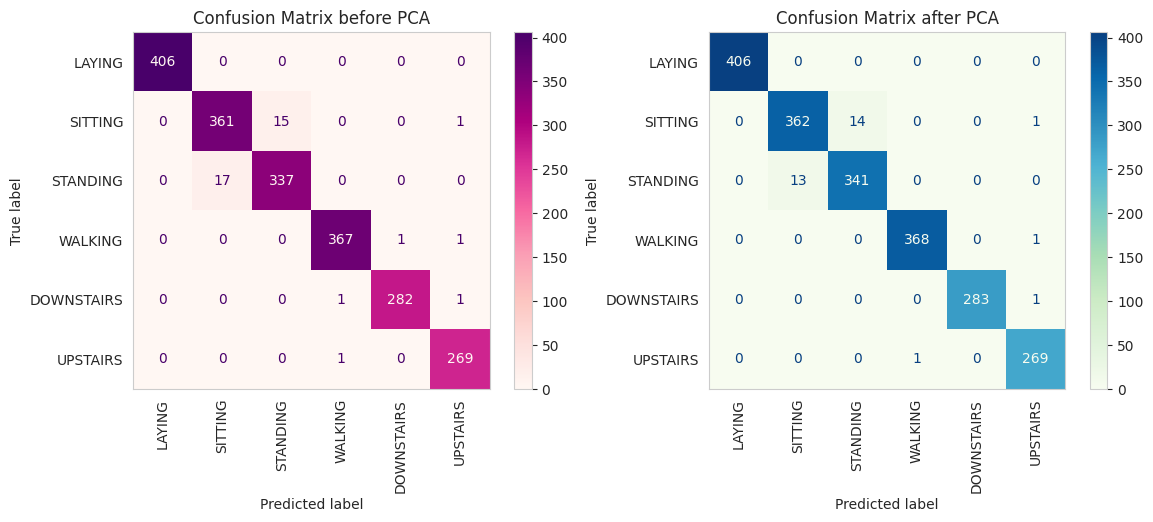

In [ ]:
# Example usage with Logistic Regression
from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
}

best_lr = tuning(LogisticRegression, param_grid_lr, x_train, x_test, y_train, y_test)
# Train a Logistic Regression model with the best hyperparameters on the reduced training data
best_lr1 = tuning(LogisticRegression, param_grid_lr, x_train_reduced, x_test_reduced, y_train, y_test)

# Evaluate the best model and print the confusion matrix
confusion_mat(best_lr, best_lr1, "Logistic Regression (Tuned)", x_train, x_test, y_train, y_test, x_train_reduced, x_test_reduced)

In [ ]:
a1=evaluate_classification_perclass(best_lr,best_lr1,"Logistic Regression", x_train, x_test, y_train, y_test,x_train_reduced,x_test_reduced,le)
a1

Classification report of the Logistic Regression for each class


,Precision (Before PCA),Recall (Before PCA),F1-score (Before PCA),Support (Before PCA),Precision (After PCA),Recall (After PCA),F1-score (After PCA),Support (After PCA)
LAYING,1.000000,1.000000,1.000000,406.0,1.000000,1.000000,1.000000,406.0
SITTING,0.955026,0.957560,0.956291,377.0,0.965333,0.960212,0.962766,377.0
STANDING,0.957386,0.951977,0.954674,354.0,0.960563,0.963277,0.961918,354.0
WALKING,0.994580,0.994580,0.994580,369.0,0.997290,0.997290,0.997290,369.0
WALKING_DOWNSTAIRS,0.996466,0.992958,0.994709,284.0,1.000000,0.996479,0.998236,284.0
WALKING_UPSTAIRS,0.988971,0.996296,0.992620,270.0,0.988971,0.996296,0.992620,270.0


In [ ]:
a2 = evaluate_classification_overall(best_lr,best_lr1,"Logistic Regression", x_train, x_test, y_train, y_test,x_train_reduced,x_test_reduced)
a2

Classification Report for Logistic Regression


,Train_Score,Accuracy(Test_Score)
Without pca,0.989076,0.981553
With pca,0.992718,0.984951


#2. K Nearest Neighbours

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best KNeighborsClassifier Hyperparameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 1}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best KNeighborsClassifier Hyperparameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 1}
Right Classification before PCA: 2027
Right Classification after PCA : 1995
Wrong Classification before PCA : 33
Wrong Classification after PCA: 65


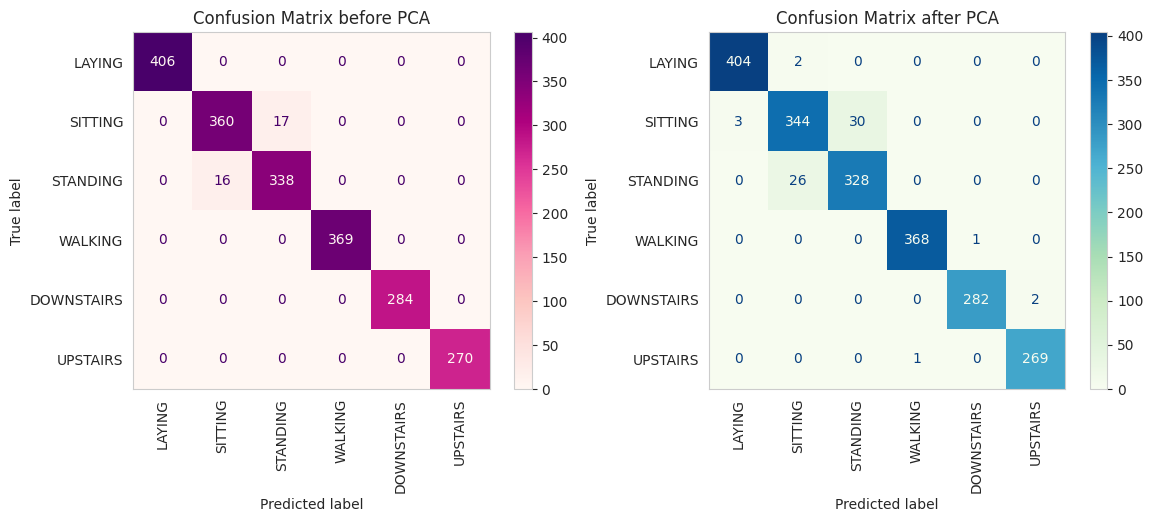

In [ ]:
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9,13,15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

best_knn = tuning(KNeighborsClassifier, param_grid_knn, x_train, x_test, y_train, y_test)
best_knn1 = tuning(KNeighborsClassifier, param_grid_knn, x_train_reduced, x_test_reduced, y_train, y_test)

# Evaluate the best model and print the confusion matrix
confusion_mat(best_knn, best_knn1, "K-Nearest Neighbours (Tuned)", x_train, x_test, y_train, y_test, x_train_reduced, x_test_reduced)


In [ ]:
b1=evaluate_classification_perclass(best_knn,best_knn1,"K Nearest Neighbours", x_train, x_test, y_train, y_test,x_train_reduced,x_test_reduced,le)
b1

Classification report of the K Nearest Neighbours for each class


,Precision (Before PCA),Recall (Before PCA),F1-score (Before PCA),Support (Before PCA),Precision (After PCA),Recall (After PCA),F1-score (After PCA),Support (After PCA)
LAYING,1.000000,1.000000,1.000000,406.0,0.992629,0.995074,0.993850,406.0
SITTING,0.957447,0.954907,0.956175,377.0,0.924731,0.912467,0.918558,377.0
STANDING,0.952113,0.954802,0.953456,354.0,0.916201,0.926554,0.921348,354.0
WALKING,1.000000,1.000000,1.000000,369.0,0.997290,0.997290,0.997290,369.0
WALKING_DOWNSTAIRS,1.000000,1.000000,1.000000,284.0,0.996466,0.992958,0.994709,284.0
WALKING_UPSTAIRS,1.000000,1.000000,1.000000,270.0,0.992620,0.996296,0.994455,270.0


In [ ]:
b2=evaluate_classification_overall(best_knn,best_knn1,"K Nearest Neighbours", x_train, x_test, y_train, y_test,x_train_reduced,x_test_reduced)
b2

Classification Report for K Nearest Neighbours


,Train_Score,Accuracy(Test_Score)
Without pca,1.0,0.983981
With pca,1.0,0.968447


#3. Naive Bayes

Right Classification before PCA: 1537
Right Classification after PCA : 1736
Wrong Classification before PCA : 523
Wrong Classification after PCA: 324


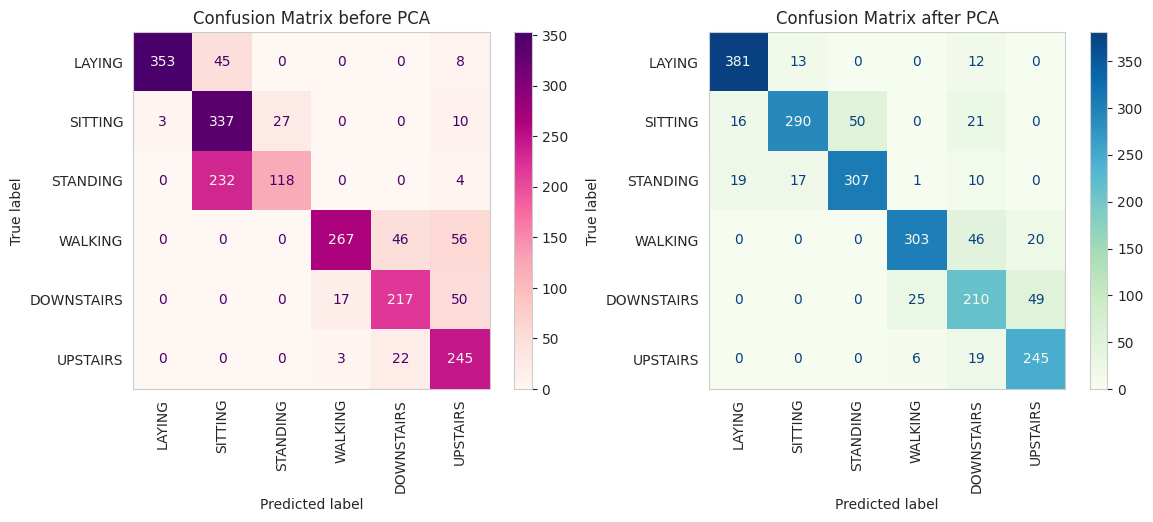

In [ ]:
nb = GaussianNB().fit(x_train, y_train)
nb1 = GaussianNB().fit(x_train_reduced, y_train)
confusion_mat(nb,nb1,"Naive Bayes", x_train, x_test, y_train, y_test,x_train_reduced,x_test_reduced)

In [ ]:
c1=evaluate_classification_perclass(nb,nb1,"Naive Bayes", x_train, x_test, y_train, y_test,x_train_reduced,x_test_reduced,le)
c1

Classification report of the Naive Bayes for each class


,Precision (Before PCA),Recall (Before PCA),F1-score (Before PCA),Support (Before PCA),Precision (After PCA),Recall (After PCA),F1-score (After PCA),Support (After PCA)
LAYING,0.991573,0.869458,0.926509,406.0,0.915865,0.938424,0.927007,406.0
SITTING,0.548860,0.893899,0.680121,377.0,0.906250,0.769231,0.832138,377.0
STANDING,0.813793,0.333333,0.472946,354.0,0.859944,0.867232,0.863572,354.0
WALKING,0.930314,0.723577,0.814024,369.0,0.904478,0.821138,0.860795,369.0
WALKING_DOWNSTAIRS,0.761404,0.764085,0.762742,284.0,0.660377,0.739437,0.697674,284.0
WALKING_UPSTAIRS,0.656836,0.907407,0.762053,270.0,0.780255,0.907407,0.839041,270.0


In [ ]:
c2=evaluate_classification_overall(nb,nb1,"Naive Bayes", x_train, x_test, y_train, y_test,x_train_reduced,x_test_reduced)
c2

Classification Report for Naive Bayes


,Train_Score,Accuracy(Test_Score)
Without pca,0.730671,0.746117
With pca,0.855079,0.842718


#4. Decision Tree

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best DecisionTreeClassifier Hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'entropy'}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best DecisionTreeClassifier Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20, 'criterion': 'entropy'}
Right Classification before PCA: 1941
Right Classification after PCA : 1766
Wrong Classification before PCA : 119
Wrong Classification after PCA: 294


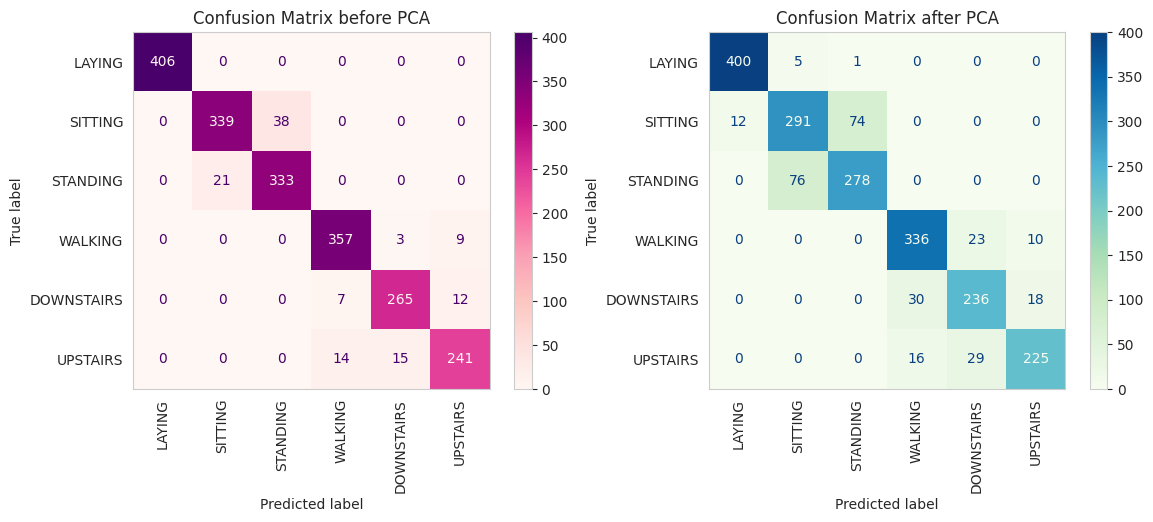

In [ ]:
# Hyperparameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4]
}

best_dt = tuning(DecisionTreeClassifier, param_grid_dt, x_train, x_test, y_train, y_test)
best_dt1 = tuning(DecisionTreeClassifier, param_grid_dt, x_train_reduced, x_test_reduced, y_train, y_test)

# Evaluate the best Decision Tree models and print the confusion matrix
confusion_mat(best_dt, best_dt1, "Decision Tree (Tuned)", x_train, x_test, y_train, y_test, x_train_reduced, x_test_reduced)

In [ ]:
d1=evaluate_classification_perclass(best_dt,best_dt1,"Decision Tree", x_train, x_test, y_train, y_test,x_train_reduced,x_test_reduced,le)
d1

Classification report of the Decision Tree for each class


,Precision (Before PCA),Recall (Before PCA),F1-score (Before PCA),Support (Before PCA),Precision (After PCA),Recall (After PCA),F1-score (After PCA),Support (After PCA)
LAYING,1.000000,1.000000,1.000000,406.0,0.970874,0.985222,0.977995,406.0
SITTING,0.941667,0.899204,0.919946,377.0,0.782258,0.771883,0.777036,377.0
STANDING,0.897574,0.940678,0.918621,354.0,0.787535,0.785311,0.786421,354.0
WALKING,0.944444,0.967480,0.955823,369.0,0.879581,0.910569,0.894807,369.0
WALKING_DOWNSTAIRS,0.936396,0.933099,0.934744,284.0,0.819444,0.830986,0.825175,284.0
WALKING_UPSTAIRS,0.919847,0.892593,0.906015,270.0,0.889328,0.833333,0.860421,270.0


In [ ]:
d2=evaluate_classification_overall(best_dt,best_dt1,"Decision Tree", x_train, x_test, y_train, y_test,x_train_reduced,x_test_reduced)
d2

Classification Report for Decision Tree


,Train_Score,Accuracy(Test_Score)
Without pca,0.995266,0.942233
With pca,0.976211,0.857282


#5. Random Forest

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best RandomForestClassifier Hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'entropy'}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best RandomForestClassifier Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'entropy'}
Right Classification before PCA: 2015
Right Classification after PCA : 1944
Wrong Classification before PCA : 45
Wrong Classification after PCA: 116


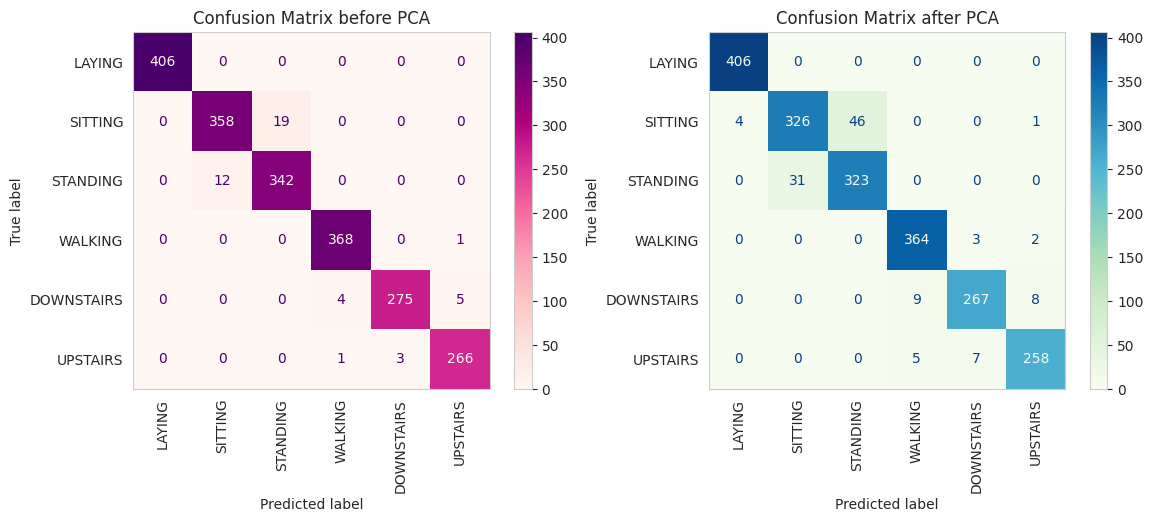

In [ ]:
# Hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4]
}

# Tuning and evaluation for Random Forest
best_rf = tuning(RandomForestClassifier, param_grid_rf, x_train, x_test, y_train, y_test)
best_rf1 = tuning(RandomForestClassifier, param_grid_rf, x_train_reduced, x_test_reduced, y_train, y_test)

# Evaluate the best Random Forest models and print the confusion matrix
confusion_mat(best_rf, best_rf1, "Random Forest (Tuned)", x_train, x_test, y_train, y_test, x_train_reduced, x_test_reduced)

In [ ]:
e1=evaluate_classification_perclass(best_rf,best_rf1,"Random Forest", x_train, x_test, y_train, y_test,x_train_reduced,x_test_reduced,le)
e1

Classification report of the Random Forest for each class


,Precision (Before PCA),Recall (Before PCA),F1-score (Before PCA),Support (Before PCA),Precision (After PCA),Recall (After PCA),F1-score (After PCA),Support (After PCA)
LAYING,1.000000,1.000000,1.000000,406.0,0.990244,1.000000,0.995098,406.0
SITTING,0.967568,0.949602,0.958501,377.0,0.913165,0.864721,0.888283,377.0
STANDING,0.947368,0.966102,0.956643,354.0,0.875339,0.912429,0.893499,354.0
WALKING,0.986595,0.997290,0.991914,369.0,0.962963,0.986450,0.974565,369.0
WALKING_DOWNSTAIRS,0.989209,0.968310,0.978648,284.0,0.963899,0.940141,0.951872,284.0
WALKING_UPSTAIRS,0.977941,0.985185,0.981550,270.0,0.959108,0.955556,0.957328,270.0


In [ ]:
e2=evaluate_classification_overall(best_rf,best_rf1,"Random Forest", x_train, x_test, y_train, y_test,x_train_reduced,x_test_reduced)
e2

Classification Report for Random Forest


,Train_Score,Accuracy(Test_Score)
Without pca,1.0,0.978155
With pca,1.0,0.943689


#6. XGBoost

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best XGBClassifier Hyperparameters: {'subsample': 0.8, 'n_estimators': 30, 'max_depth': 5, 'learning_rate': 0.2}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best XGBClassifier Hyperparameters: {'subsample': 0.8, 'n_estimators': 30, 'max_depth': 5, 'learning_rate': 0.1}
Right Classification before PCA: 2028
Right Classification after PCA : 1891
Wrong Classification before PCA : 32
Wrong Classification after PCA: 169


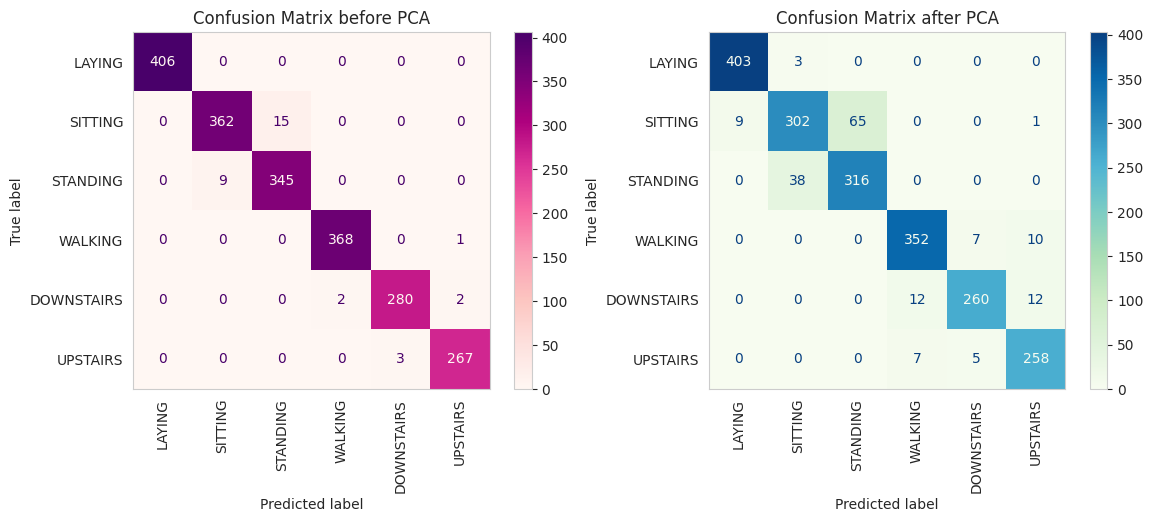

In [ ]:
from xgboost import XGBClassifier

# Hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
}

# Tuning and evaluation for XGBoost
best_xgb = tuning(XGBClassifier, param_grid_xgb, x_train, x_test, y_train, y_test)
best_xgb1 = tuning(XGBClassifier, param_grid_xgb, x_train_reduced, x_test_reduced, y_train, y_test)

# Evaluate the best XGBoost models and print the confusion matrix
confusion_mat(best_xgb, best_xgb1, "XGBoost", x_train, x_test, y_train, y_test, x_train_reduced, x_test_reduced)


In [ ]:
f1=evaluate_classification_perclass(best_xgb,best_xgb1,"XGBoost", x_train, x_test, y_train, y_test,x_train_reduced,x_test_reduced,le)
f1

Classification report of the XGBoost for each class


,Precision (Before PCA),Recall (Before PCA),F1-score (Before PCA),Support (Before PCA),Precision (After PCA),Recall (After PCA),F1-score (After PCA),Support (After PCA)
LAYING,1.000000,1.000000,1.000000,406.0,0.978155,0.992611,0.985330,406.0
SITTING,0.975741,0.960212,0.967914,377.0,0.880466,0.801061,0.838889,377.0
STANDING,0.958333,0.974576,0.966387,354.0,0.829396,0.892655,0.859864,354.0
WALKING,0.994595,0.997290,0.995940,369.0,0.948787,0.953930,0.951351,369.0
WALKING_DOWNSTAIRS,0.989399,0.985915,0.987654,284.0,0.955882,0.915493,0.935252,284.0
WALKING_UPSTAIRS,0.988889,0.988889,0.988889,270.0,0.918149,0.955556,0.936479,270.0


In [ ]:
f2=evaluate_classification_overall(best_xgb,best_xgb1,"XGBoost", x_train, x_test, y_train, y_test,x_train_reduced,x_test_reduced)
f2

Classification Report for XGBoost


,Train_Score,Accuracy(Test_Score)
Without pca,0.999272,0.984466
With pca,0.964680,0.917961


In [ ]:
#Creating two lists of accuracy scores before and after PCA
x = [a2,b2,c2,d2,e2,f2]
accuracy = []
accuracy_pca = []
for i in x:
  value = np.round(i._get_value('Without pca','Accuracy(Test_Score)')*100,2)
  value_pca = np.round(i._get_value('With pca','Accuracy(Test_Score)')*100,2)
  accuracy.append(value)
  accuracy_pca.append(value_pca)

In [ ]:
#Creating a dataframe of the accuracy scores before and after PCA for each model in descending order of accuracy
report = {'Accuracy_before_pca(%)':accuracy,
          'Accuracy_after_pca(%)':accuracy_pca}
index = ['Logistic Regression','K Nearest Neighbours','Naive Bayes Classifier','Decision Tree Classifier','Random Forest Classifier','XGBoostClassifier']
final_report = pd.DataFrame(report,index=index)
final_report.sort_values(by=['Accuracy_after_pca(%)'],ascending=False)

,Accuracy_before_pca(%),Accuracy_after_pca(%)
Logistic Regression,98.16,98.50
K Nearest Neighbours,98.40,96.84
Random Forest Classifier,97.82,94.37
XGBoostClassifier,98.45,91.80
Decision Tree Classifier,94.22,85.73
Naive Bayes Classifier,74.61,84.27


<Axes: >

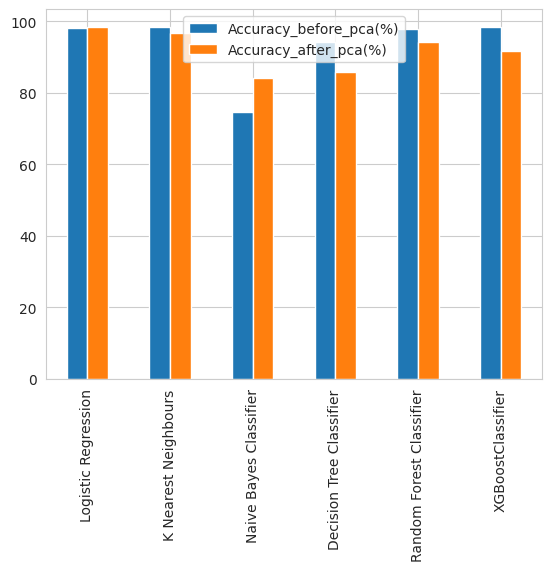

In [ ]:
final_report.plot.bar()

In [ ]:
#Creating two lists of accuracy scores before and after PCA
x = [a2,b2,c2,d2,e2]
accuracy = []
accuracy_pca = []
for i in x:
  value = np.round(i._get_value('Without pca','Accuracy(Test_Score)')*100,2)
  value_pca = np.round(i._get_value('With pca','Accuracy(Test_Score)')*100,2)
  accuracy.append(value)
  accuracy_pca.append(value_pca)

#RESULTS

1. Logistic Regression has the highest accuracy in classifying the activities with 98.16% before PCA and 98.50% after PCA.
2. Naive Bayes has the lowest accuracy in classifying the activities with 74.61% before PCA and 84.27% after PCA.
3. We see that PCA is useful in increasing the accuracy of only Logistic Regression and Naive Bayes Classifier.
4. Since it is a multiclass classification, F1- score is more important than Accuracy. We see that the activity Laying has the highest F1-Score across all the models which indicates that this activity is well classified.
